# Introduction

The data file is an RSS feed from the BBC Northern Ireland website.
Articles were taken from two main topics, sports and news. The file is in a JSON format. 

The data contains a list containing complex collections of data (See: Analysis of data types below) : 
- the “_id” in the form of a string, 
- the “_index”
- the “_score”
- ”_source” and 
- “sort”.

The “_source”, in the form of a dictionary, contains several further lists, among them the “titles_rss” and “teasers_rss” from these the Titles and the Teasers of the corresponding articles could be extracted. The titles and teasers were used to display  two histograms of the ten most frequent used words and a sample of the titles and teasers are displayed as well, since there were 60 in total, which would have been too many to print in total. 

In the “_source” the dictionary “metadata” can also be found, which in turn contains the “htmlsource” code. In the htmlsource code part of the code named _byline_ was used to find the author of the articles and the most prolific of them are listed below together with the number of articles they wrote. Though not all of the articles had authors listed.

The dates were extracted from the dictionary “_source” under the list “publication_dates”. In order to facilitate a comparison of the articles only the year, month and day were extracted not using the time the article was published. Some of the data was present in multiple dictionaries such as the title being in dictionary “_source” but also in its subset “htmlsource”. Due to this occurrence it was attempted to always use the higher level of a dictionary and not delve deeper into lists of dictionaries. Other lists were on the same level but provided similar information such as url compared to Some lists were not at all used as they contained little value of information such as the list “sort”. 

## Reading the data and summary of titles and teasers

In [2]:
#%% open and read in data and take a look at the first 10 lines
import json
with open ("takehome60.json", mode="r", encoding= "utf-8") as file:
    data = json.load(file)
 
data_short= data[:10]

separator="\n------------------------------------------------------------------------------------------------"
#%% print titles and teasers 
titles = []
teasers = []
for element in data:
    titles.append(element["_source"]["title_rss"])
    teasers.append (element["_source"]["teaser_rss"])

print(separator, "\nA sample of the titles\n", separator)
for each_title in  titles[:10]:
        print (each_title)

print("\n",separator, "\nA sample of the teasers\n", separator)
for each_teaser in  teasers[:10]:
        print (each_teaser)


------------------------------------------------------------------------------------------------ 
A sample of the titles
 
------------------------------------------------------------------------------------------------
Year in pictures: Part 2
77 'paedophile hunter' cases investigated by PSNI
Irish Hockey League: Glenanne beat Lisnagarvey to clinch title
Game of Thrones lands special Bafta award
Holywood crash: Police want help to identify injured teen
New Year Honours 2018: Beckett and Moss awarded MBEs
Irish horse Tiger Roll wins Grand National
Northern Ireland forecast
Ulster University withdraws status from Prof Richard Lynn
Inzamam's nephew Imam-ul-Haq named in Pakistan Test squad

 
------------------------------------------------------------------------------------------------ 
A sample of the teasers
 
------------------------------------------------------------------------------------------------
A selection of BBC News NI's year in pictures from April to June 2017
A team of

## Analysis of data types

In [3]:
#%% type of data
data_type = {}
keys=[]
types=[]

for element in data:
    for key,value in element.items():
            if not(key in keys):
                keys.append(key)
                types.append(type(value).__name__)        
                if isinstance(value,dict):
                    for key1, val1 in value.items():
                        if not(key1 in keys):
                            keys.append(str(key)+"."+ str(key1))
                            types.append(type(val1).__name__)        
                        if isinstance(val1,dict):
                            for key2, val2 in val1.items():
                                if not(key2 in keys):
                                    keys.append(str(key)+"."+ str(key1)+"."+ str(key2))
                                    types.append (type(val2).__name__)
                            
import ipywidgets as widgets
from IPython import display
import pandas as pd

# sample data
df1 = pd.DataFrame({"Item": keys, "Type":types  })
widget1 = widgets.Output()

# render in output widgets
with widget1:
    display.display(df1)

# create HBox
hbox = widgets.HBox([widget1])

# render hbox
hbox

## frequency of words (excluding stop words) in titles and teasers

In [4]:
#%% frequency of words (excluding stop words) in titles and teasers

import spacy
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

from collections import Counter

allwords_titles=[]

#TODO: Should really remove superfluous punctuation marks from values
for value in titles:
    tokenized=[val.lower() for val in value.split()]
    allwords_titles.extend([word for word in tokenized if not word in all_stopwords])
    
c_titles=Counter(allwords_titles)
print(separator,"\nThese are the 10 most frequent words used in titles:\n", 
      separator,"\n",c_titles.most_common(10))

allwords_teasers = []
for value in teasers:
    tokenized=[val.lower() for val in value.split()]
    allwords_teasers.extend([word for word in tokenized if not word in all_stopwords])
    
c_teaser=Counter(allwords_teasers)
print(separator,"\nThese are the most frequent words used in teasers:", 
      separator, c_teaser.most_common(10))



------------------------------------------------------------------------------------------------ 
These are the 10 most frequent words used in titles:
 
------------------------------------------------------------------------------------------------ 
 [('ni', 10), ('man', 6), ('ireland', 4), ('ulster', 4), ('paper', 4), ('review:', 4), ('belfast', 4), ('league:', 3), ('injured', 3), ('wins', 3)]

------------------------------------------------------------------------------------------------ 
These are the most frequent words used in teasers: 
------------------------------------------------------------------------------------------------ [('ireland', 9), ('northern', 8), ('says', 6), ('saturday', 6), ('league', 4), ('belfast', 4), ('victory', 4), ('win', 3), ('public', 3), ('game', 3)]


## Visualization of Frequent Words in Titles in a Histogram

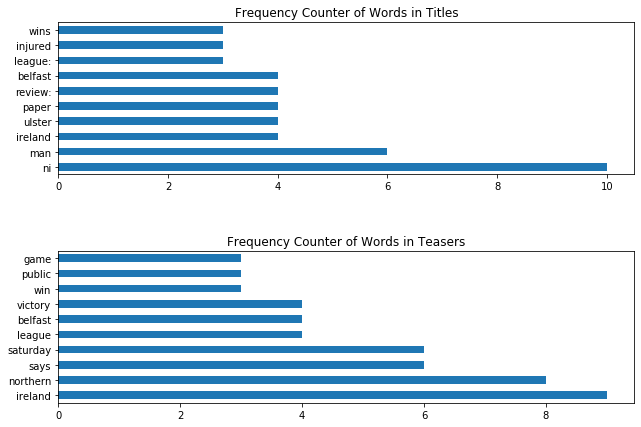

In [5]:
#%% Visualization of Frequent Words in Titles in a Histogram
import pandas as pd
import pandas as pd2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,7))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)


top10_titles = c_titles.most_common(10)
x_titles=[]
y_titles=[]
for bars in top10_titles:
    x_titles.append(bars[0])
    y_titles.append(bars[1])

pd.Series(y_titles,x_titles).plot(kind="barh", 
                                  ylim=tuple([0,max(y_titles)*1.1]), 
                                  title = "Frequency Counter of Words in Titles")

top10_teasers = c_teaser.most_common(10)
# Divide the figure into a 2x1 grid, and give me the second section

ax2 = fig.add_subplot(212)
x_teaser=[]
y_teaser=[]
for bars_teaser in top10_teasers:
    x_teaser.append(bars_teaser[0])
    y_teaser.append(bars_teaser[1])

pd2.Series(y_teaser,x_teaser).plot(kind="barh",
                                   ylim=tuple([0,max(y_teaser)*1.1]),
                                   title = "Frequency Counter of Words in Teasers")

fig.subplots_adjust(hspace=0.5, left=0.5) # do NOT ask how I chose these spacings :-)


## Average lengths of the titles and teasers

In [6]:
#%% Average lengths of the titles and teasers

#Titles
print(separator, "\nSome Statistics on the titles and teasers", separator)

length_title=[]
for characters in titles:
    length_title.append(len(characters))

print("The number of titles is\t\t", len (length_title))
print ("Average length of titles is\t", sum(length_title)/len(length_title))

#Teasers
length_teaser=[]
for words in teasers:
    length_teaser.append(len(words))
print("The number of teasers is\t", len (length_teaser))
print ("Average length of teasers is\t", sum(length_teaser)/len(length_teaser))


------------------------------------------------------------------------------------------------ 
Some Statistics on the titles and teasers 
------------------------------------------------------------------------------------------------
The number of titles is		 60
Average length of titles is	 50.25
The number of teasers is	 60
Average length of teasers is	 102.83333333333333


## publication dates (by month and year)

In [7]:
   
dates = []
for publicationdate in data:
    dates.append((publicationdate["_source"]["publication_date"])[:10])
    
dates_short = dates[:10]
print (separator, "\nThese are the publication dates of the articles:", separator)
dateCounter = Counter(dates)
topDates = dateCounter.most_common(10)

for dates in range(10):
    print ( "\t", 
           dates+1,"\t",  
           topDates[dates][0], 
           "Number of Dates:\t",  
           topDates[dates][1])



------------------------------------------------------------------------------------------------ 
These are the publication dates of the articles: 
------------------------------------------------------------------------------------------------
	 1 	 2018-04-14 Number of Dates:	 8
	 2 	 2017-12-29 Number of Dates:	 4
	 3 	 2018-01-10 Number of Dates:	 4
	 4 	 2017-12-19 Number of Dates:	 4
	 5 	 2017-12-21 Number of Dates:	 4
	 6 	 2018-04-16 Number of Dates:	 3
	 7 	 2018-04-15 Number of Dates:	 3
	 8 	 2017-12-27 Number of Dates:	 3
	 9 	 2017-12-22 Number of Dates:	 3
	 10 	 2018-01-06 Number of Dates:	 3


## Analysis of Topics and Subtopics

In [8]:
#%% URL's taken apart to get main and sub-subject e.g sport, news and hockey.
    

url_total = []
main_topics = []
sub_topics = []
for url in data:
    thisURL=url["_id"]
    url_total.append(url["_id"])
    sections=thisURL.split("/")
    main_topics.append(sections[3])
    sub_topics.extend(sections[4:])
    
topicCounter=Counter(main_topics)
topTopics=topicCounter.most_common(10)
print ( separator,"\nThese are the most common topics:",separator)
for main_topics in range(2):
    print ( "\t", 
           main_topics+1,  
           topTopics[main_topics][0], 
           "Number of different Topics:\t\t",  
           topTopics[main_topics][1])

print ( separator,"\nThese are the most common subtopics:",separator)
subtopicCounter=Counter(sub_topics)
topSubtopics=subtopicCounter.most_common(5)
for sub_topics in range(5):
    print ( "\t", 
           sub_topics+1,  
           topSubtopics[sub_topics][0], 
           ":\t\t",  
           topSubtopics[sub_topics][1])    
    


------------------------------------------------------------------------------------------------ 
These are the most common topics: 
------------------------------------------------------------------------------------------------
	 1 news Number of different Topics:		 41
	 2 sport Number of different Topics:		 19

------------------------------------------------------------------------------------------------ 
These are the most common subtopics: 
------------------------------------------------------------------------------------------------
	 1 football :		 4
	 2 rugby-union :		 3
	 3 northern-ireland :		 2
	 4 horse-racing :		 2
	 5 gaelic-games :		 2


## Authors of Articles

In [9]:
#%% Authors and the Frequency of them
author = []
authorDict={}

for element in data:
    try:        #since not all elements have a byline, try for a byline and if not there then jump over
        bline=element["_source"]["byline"]
        auth=bline[3:]           
        authorDict[element["_id"]]=auth
    except:
        pass

authCounter=Counter(authorDict.values())
topAuthors=authCounter.most_common(10)

print ( separator,"\nThese are the most prolific authors:",separator)
for journalist in range(10):
    print ( "\t", 
           journalist+1,  
           topAuthors[journalist][0], 
           "Number of Articles:\t",  
           topAuthors[journalist][1])


------------------------------------------------------------------------------------------------ 
These are the most prolific authors: 
------------------------------------------------------------------------------------------------
	 1 Robbie Meredith Number of Articles:	 3
	 2 Niall Glynn Number of Articles:	 3
	 3 John Campbell Number of Articles:	 3
	 4 Rick Faragher Number of Articles:	 1
	 5 Stephen Walker Number of Articles:	 1
	 6 Vincent Kearney Number of Articles:	 1
	 7 Tori Watson Number of Articles:	 1
	 8 Julian O'Neill Number of Articles:	 1
	 9 Conor Macauley Number of Articles:	 1
	 10 Éamon Phoenix Number of Articles:	 1
